## Data Cleaning

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = pd.read_csv('insurance.csv')
demo_df = df

In [182]:
df.head()
# all are 'yes' or 'no' and 'male' 'female'

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Phase 6: Categorical & String Cleaning

- `df['col'].str.strip()`  
  Removes leading and trailing whitespaces  
  *(e.g., `" Male"` → `"Male"`)*

- `df['col'].str.lower()`  
  Ensures uniform text formatting  
  *(e.g., `"YES"`, `"Yes"`, `"yes"` → `"yes"`)*

- `df['col'].replace({'Old': 0, 'New': 1})`  
  Manual binary encoding for logistic regression

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [184]:
df.duplicated().sum()

np.int64(1)

In [185]:
df.drop_duplicates(keep='first',inplace=True)

In [186]:
df.duplicated().sum()

np.int64(0)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### Encoding hotkeys

In [188]:
df = pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True) # only is_male --> is_female is redundancy--> acheive bt drop_first

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   bool   
 5   smoker_yes        1337 non-null   bool   
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 58.8 KB


# 2. EDA

In [190]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   bool   
 5   smoker_yes        1337 non-null   bool   
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 58.8 KB
None
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    

Text(0.5, 1.0, 'Distribution Analysis')

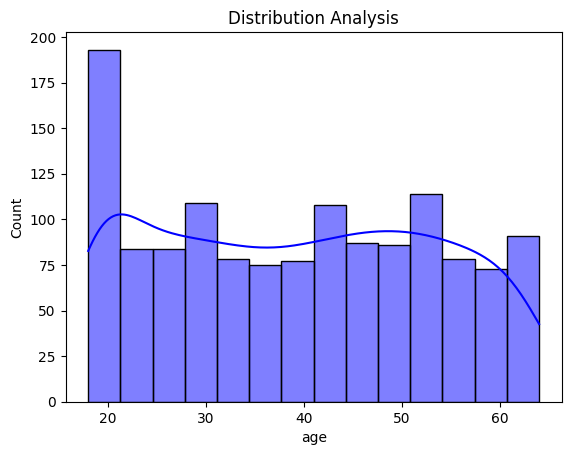

In [191]:
sns.histplot(df['age'], kde=True , color ='blue',bins=14)
plt. title ('Distribution Analysis')

### Right skewed - log(1+x) transform needed

Text(0.5, 1.0, 'Distribution Analysis')

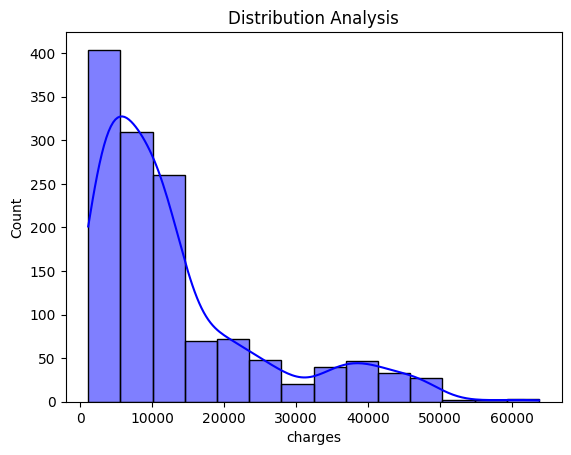

In [192]:
sns.histplot(df['charges'], kde=True , color ='blue',bins=14)
plt. title ('Distribution Analysis')

<Axes: xlabel='charges'>

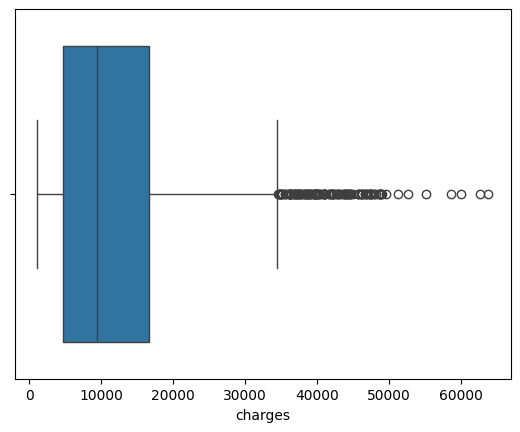

In [193]:
# Visualizing potential outliers
sns.boxplot(x=df['charges'])

<Axes: >

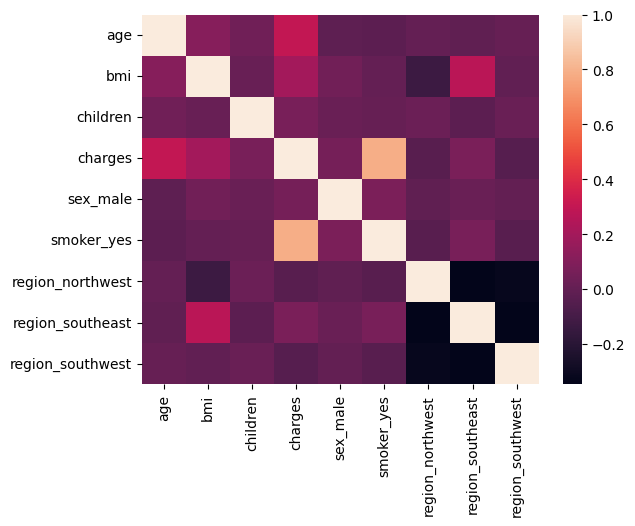

In [194]:
sns.heatmap(df.corr())

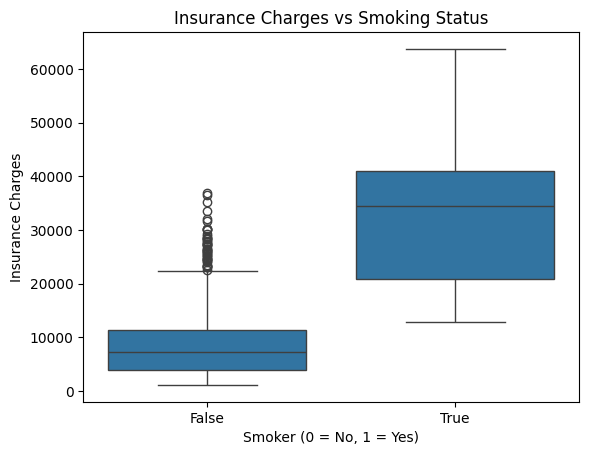

In [195]:
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges vs Smoking Status')
plt.show()

In [196]:
df['charges'].describe

<bound method NDFrame.describe of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64>

In [197]:
# Creating an interaction feature
#df['obese_smoker'] = ((df['bmi'] >= 30) & (df['smoker_yes'] == 1)).astype(int)

In [198]:
df['charges'] = np.log1p(df['charges'])

In [199]:
df['charges'].describe

<bound method NDFrame.describe of 0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1337, dtype: float64>

## Uniformly distributed now

Text(0.5, 1.0, 'Distribution Analysis')

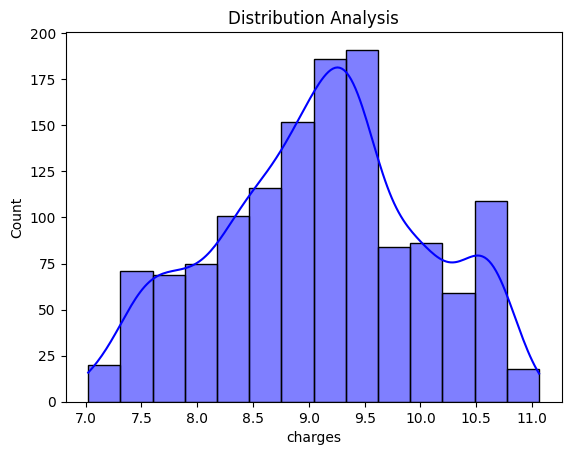

In [200]:
sns.histplot(df['charges'], kde=True , color ='blue',bins=14)
plt. title ('Distribution Analysis')

In [201]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,9.100097
std,14.044333,6.100468,1.205571,0.918551
min,18.000000,15.960000,0.000000,7.023647
25%,27.000000,26.290000,0.000000,8.465341
50%,39.000000,30.400000,1.000000,9.147098
75%,51.000000,34.700000,2.000000,9.720689
max,64.000000,53.130000,5.000000,11.063061


In [202]:
df_original = df

### *`age`* and *`bmi`* yk ranges lets make it 0-1 better for linear regression => Feature scaling

In [203]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['charges'])
y = df['charges']

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [205]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
#num_cols = num_cols.drop('obese_smoker')
num_cols

Index(['age', 'bmi', 'children'], dtype='object')

In [206]:
from sklearn.preprocessing import StandardScaler
# only scalarize the age and bmi and children
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [207]:
X_train.value_counts()

age        bmi        children   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
-1.515026  -2.410382  -0.907908  True      False       False             False             False               1
 0.557580   2.443305  -0.070502  False     False       False             True              False               1
           -0.384431   2.441716  True      False       False             False             False               1
           -0.193490  -0.070502  False     False       False             True              False               1
           -0.164560  -0.070502  False     False       True              False             False               1
                                                                                                              ..
-0.585927  -0.648110  -0.907908  False     False       False             True              False               1
           -0.604301  -0.070502  True      False       False             False             False     

In [208]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [209]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X=X_train,y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [210]:
y_pred_log = model1.predict(X_test)
y_pred_log

array([ 8.93729181,  8.67016676,  9.51818498, 10.27272176,  8.60393505,
        9.204177  , 10.05206352,  8.01858825,  8.95328049,  9.27225545,
        9.35954966, 10.59664829, 10.14208872,  9.60321754,  8.94134584,
        8.97971442,  8.08737522, 10.17012885,  8.26816701,  8.39787474,
        8.03766677, 10.20434728,  9.3489262 , 10.20870807, 10.13504171,
        8.36313184, 10.61795512, 10.88252083,  9.22187642,  9.47224257,
        8.51467145,  9.13324168,  7.86477595,  9.34065086, 10.92012032,
        9.23360106,  8.46885689,  8.58830005, 10.46078282,  8.95544876,
        8.3236868 , 10.5132544 , 10.61645962,  9.23307295,  9.03299446,
        8.24224936,  8.1939741 ,  8.90514365,  8.40073853,  8.79630078,
        8.50786246,  8.86221563, 10.4828183 ,  7.96523682,  8.97110316,
        8.94455307,  9.17311372,  8.25380027, 10.07539194,  8.92618217,
        9.53129475,  8.66256058,  9.39182682,  7.93108155,  9.60393348,
        9.36453711,  8.85366552, 10.23895264,  9.42188705,  9.74

In [211]:
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test)

## Accuracy

In [212]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming y_test is your original charges in the test set
# and y_pred_unlog are your exponentiated predictions

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-Squared Accuracy: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

R-Squared Accuracy: 0.7181
Mean Absolute Error (MAE): $3755.92
Root Mean Squared Error (RMSE): $7197.03


In [213]:
X 

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [214]:
demo_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exporting the model

**Pickle is Python’s built-in object serialization module.**                                                                             
•	Serialization = converting a Python object → byte stream (file)                                                                      
•	Deserialization = converting byte stream → Python object

**👉 Pickle does not save “the math” of the model, it saves:**                                                                           
	•	The object state (weights, parameters)                                                                                         
	•	The class definition reference                                                                                                 
	•	The exact structure as Python understands it

In [215]:
import pickle
# Save the trained model as a pickle string.
with open("insurance_cost.pkl","wb") as f:
    pickle.dump(model1,f)
with open("model_columns.pkl","wb") as f:
    pickle.dump(X.columns,f)
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)
